### 加载用mnist数据集训练好的模型，并测试单张图片(18/06/25)

In [1]:
import cv2  
import tensorflow as tf  
import numpy as np  
from sys import path  
path.append('../..')  
import matplotlib.pyplot as plt 
 

INFO:tensorflow:Restoring parameters from E:/model.ckpt
the y_con :    
 [[  3.13907047e-03   3.03866196e-04   1.11561585e-02   2.19573490e-02
    8.00761767e-03   2.41271392e-01   9.91480556e-05   6.58884994e-04
    6.98541820e-01   1.48646627e-02]]
the predict is :  8


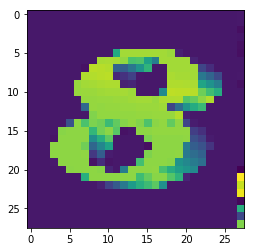

In [2]:
#初始化单个卷积核上的参数  
def weight_variable(shape):  
    initial = tf.truncated_normal(shape, stddev=0.1)  
    return tf.Variable(initial)  
  
#初始化单个卷积核上的偏置值  
def bias_variable(shape):  
    initial = tf.constant(0.1, shape=shape)  
    return tf.Variable(initial)  
  
#输入特征x，用卷积核W进行卷积运算，strides为卷积核移动步长，  
#padding表示是否需要补齐边缘像素使输出图像大小不变  
def conv2d(x, W):  
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')  
  
#对x进行最大池化操作，ksize进行池化的范围，  
def max_pool_2x2(x):  
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],strides=[1, 2, 2, 1], padding='SAME')  
    
def main():  
      
    #定义会话  
    sess = tf.InteractiveSession()  
      
    #声明输入图片数据，类别  
    x = tf.placeholder('float',[None,784])  
    x_img = tf.reshape(x , [-1,28,28,1])  
    
    W_conv1 = weight_variable([5, 5, 1, 32])  
    b_conv1 = bias_variable([32])  
    W_conv2 = weight_variable([5,5,32,64])  
    b_conv2 = bias_variable([64])  
    W_fc1 = weight_variable([7*7*64,1024])  
    b_fc1 = bias_variable([1024])  
    W_fc2 = weight_variable([1024,10])  
    b_fc2 = bias_variable([10])  
    
    
    saver = tf.train.Saver(write_version=tf.train.SaverDef.V1)   
    saver.restore(sess , 'E:/model.ckpt')  
    
    
    #进行卷积操作，并添加relu激活函数  
    h_conv1 = tf.nn.relu(conv2d(x_img,W_conv1) + b_conv1)  
    #进行最大池化  
    h_pool1 = max_pool_2x2(h_conv1)  
    
    #同理第二层卷积层  
    h_conv2 = tf.nn.relu(conv2d(h_pool1,W_conv2) + b_conv2)  
    h_pool2 = max_pool_2x2(h_conv2)  
      
    #将卷积的产出展开  
    h_pool2_flat = tf.reshape(h_pool2,[-1,7*7*64])  
    #神经网络计算，并添加relu激活函数  
    h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat,W_fc1) + b_fc1)  
    
    #输出层，使用softmax进行多分类  
    y_conv=tf.nn.softmax(tf.matmul(h_fc1, W_fc2) + b_fc2)  
    
    # mnist_data_set = extract_mnist.MnistDataSet('../../data/')  
    # x_img , y  = mnist_data_set.next_train_batch(1)  
    im = cv2.imread('D:/12.jpg',cv2.IMREAD_GRAYSCALE).astype(np.float32)  
    im = cv2.resize(im,(28,28),interpolation=cv2.INTER_CUBIC)  
    #图片预处理  
    #img_gray = cv2.cvtColor(im , cv2.COLOR_BGR2GRAY).astype(np.float32)  
    #数据从0~255转为-0.5~0.5  
    img_gray = (im - (255 / 2.0)) / 255  
    #cv2.imshow('out',img_gray)  
    #cv2.waitKey(0)  
    x_img = np.reshape(img_gray , [-1 , 784])  
    
    
    plt.imshow(img_gray) 
    output = sess.run(y_conv , feed_dict = {x:x_img})  
    print('the y_con :   ', '\n',output  )
    print( 'the predict is : ', np.argmax(output)  )
#关闭会话  
    sess.close()  
    
    
if __name__ == '__main__':  
    main()  